
... ***CURRENTLY UNDER DEVELOPMENT*** ...


## RBFs validation of historical and synthetic data

inputs required: 
  * Historical nearshore hourly waves
  * Synthetic nearshore hourly waves

in this notebook:
  * Validation: AWAC measurement 
  * Synthetic and historical waves Extremes
  

### TODO
- VALIDACION VS BOYA AWAC + PLOTEO


In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

# common
import os
import os.path as op

# pip
import numpy as np
import pandas as pd
import xarray as xr

# DEV: override installed teslakit
import sys
sys.path.insert(0, op.join(os.path.abspath(''), '..', '..', '..'))

# teslakit
from teslakit.database import Database
from teslakit.rbf import RBF_Reconstruction, RBF_Validation
from teslakit.waves import Aggregate_WavesFamilies, AWL
from teslakit.climate_emulator import Climate_Emulator

from teslakit.plotting.extremes import Plot_ReturnPeriodValidation



## Database and Site parameters

In [2]:
# --------------------------------------
# Teslakit database

p_data = r'/Users/nico/Projects/TESLA-kit/TeslaKit/data'
db = Database(p_data)

# set site
db.SetSite('ROI')


In [3]:
# --------------------------------------
# Load nearshore hourly waves for extremes analysis

# Historical
HIST_N_h = db.Load_NEARSHORE_RECONSTRUCTION_HIST_hourly()

# Simulation
SIM_N_h = db.Load_NEARSHORE_RECONSTRUCTION_SIM_hourly()


In [4]:
# --------------------------------------
# Select historical max. storms data

# get max. storms times from offshore hourly file
HIST_C_h = db.Load_HIST_Complete_hourly()  
t_ms = HIST_C_h.where(HIST_C_h.max_storms==True, drop=True).time

# select max. storms nearshore data for extremes plot
HIST_N_h = HIST_N_h.sel(time = t_ms)

# TODO: incorporar max_storms en HIST_N_h
# TODO: asegurar que no se pierden indices de tiempo horario (full nan?) durante la reconstruccion RBF



## Methodology Validation: AWL Nearshore - Annual Maxima Return Period

In [5]:
# def. some auxiliar function to select all dataset variables at vn max by groups

def grouped_max(ds, vn=None, dim=None):
    return ds.isel(**{dim: ds[vn].argmax(dim)})


In [6]:
# Historical AWL Annual Maxima

# calculate AWL annual maxima dataset
hist_AMax = HIST_N_h.groupby('time.year').apply(grouped_max, vn='AWL', dim='time')


In [7]:
# Simulation AWL Annual Maxima

# replace nans by 0
SIM_N_nonan = SIM_N_h.fillna(0)

# calculate AWL annual maxima dataset
sim_AMax = SIM_N_nonan.groupby('time.year').apply(grouped_max, vn='AWL', dim='time')


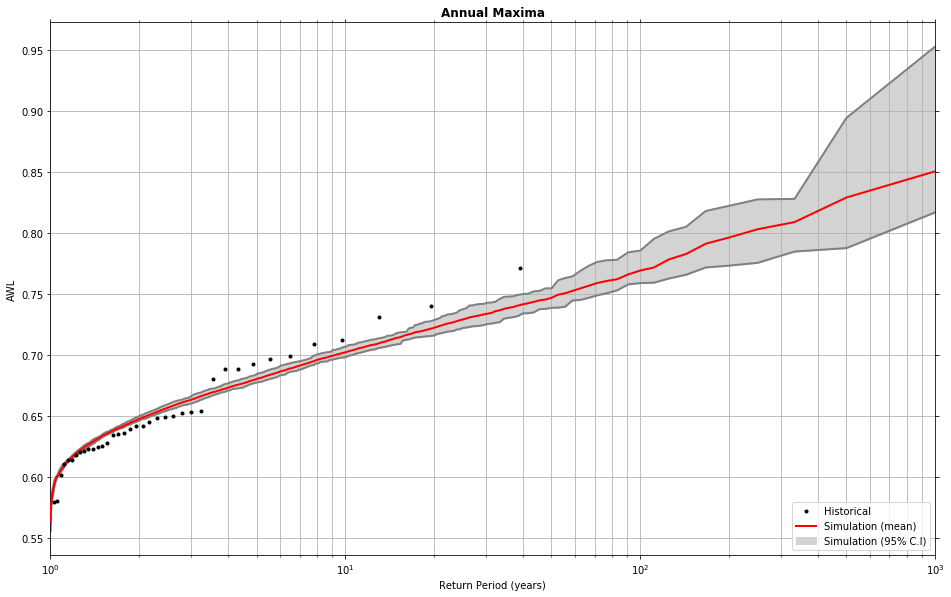

In [8]:
# AWL Annual Maxima Return Period (historical vs. simulations)

Plot_ReturnPeriodValidation(hist_AMax['AWL'], sim_AMax['AWL'].transpose());


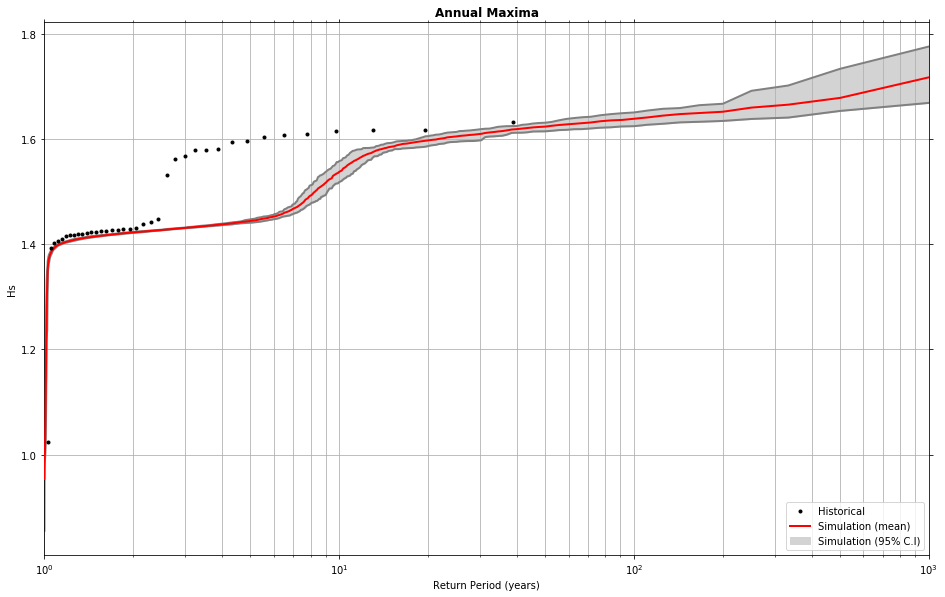

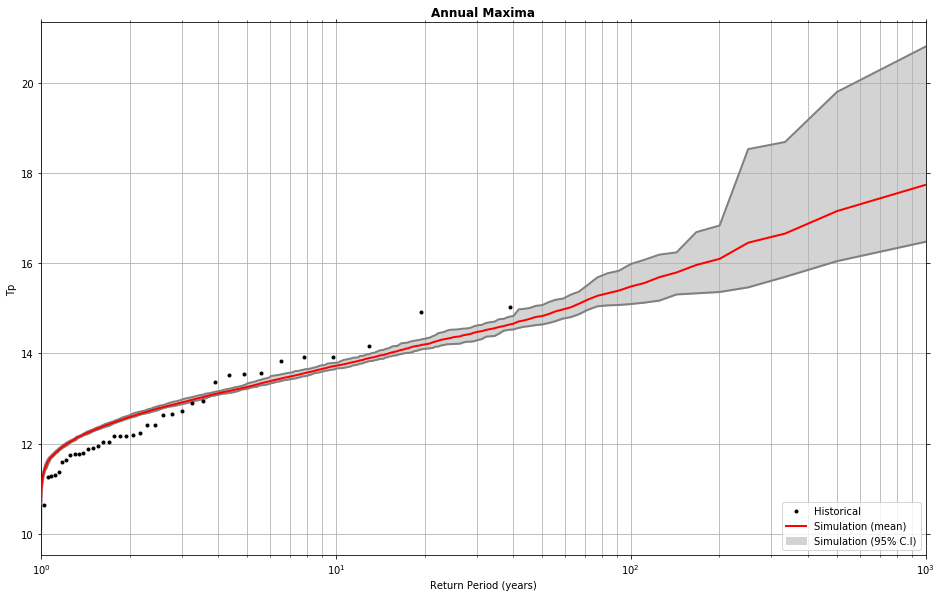

In [9]:
# Hs and Tp Return Period (historical vs. simulations) at AWL Annual Maxima

# Hs at AWL Annual Maxima
Plot_ReturnPeriodValidation(hist_AMax['Hs'], sim_AMax['Hs'].transpose());

# Tp at AWL Annual Maxima
Plot_ReturnPeriodValidation(hist_AMax['Tp'], sim_AMax['Tp'].transpose());



## Hs Nearshore - Annual Maxima Return Period

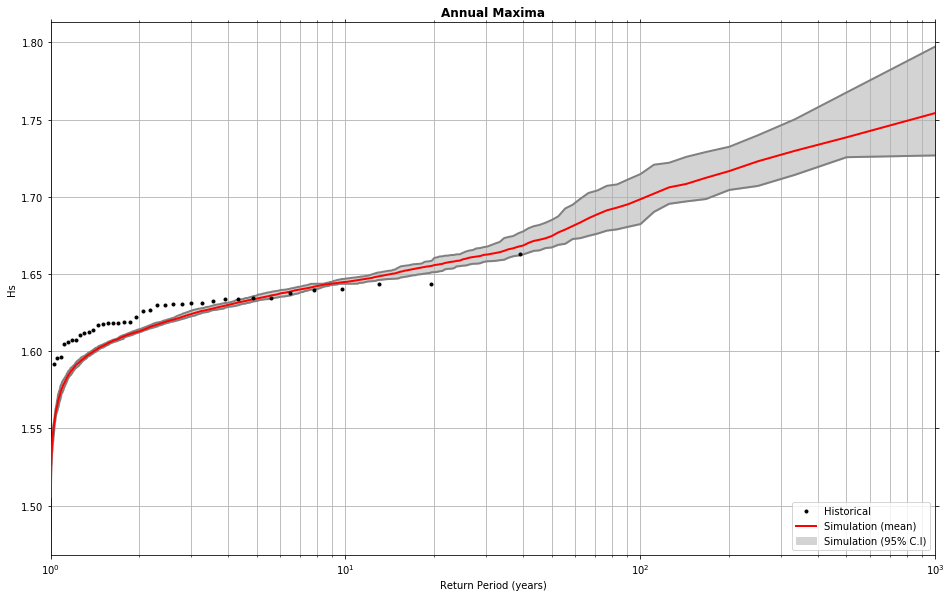

In [13]:
# calculate Annual Maxima values for historical and simulated data
hist_A = HIST_N_h['Hs'].groupby('time.year').max(dim='time')
sim_A = SIM_N_h['Hs'].groupby('time.year').max(dim='time')

# Return Period historical vs. simulations
Plot_ReturnPeriodValidation(hist_A, sim_A);



## Tp Nearshore - Annual Maxima Return Period

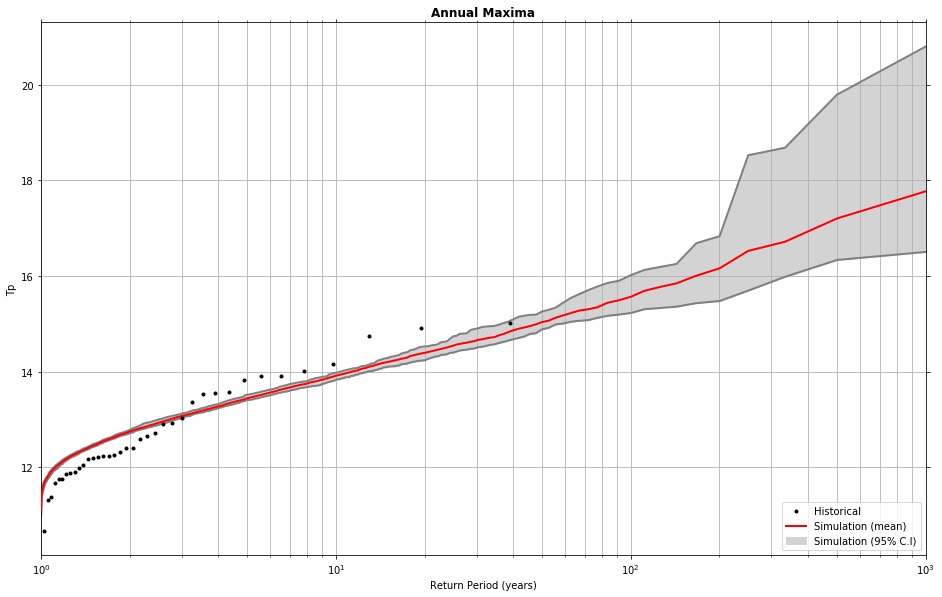

In [14]:
# calculate Annual Maxima values for historical and simulated data
hist_A = HIST_N_h['Tp'].groupby('time.year').max(dim='time')
sim_A = SIM_N_h['Tp'].groupby('time.year').max(dim='time')

# Return Period historical vs. simulations
Plot_ReturnPeriodValidation(hist_A, sim_A);



## Methodology Validation: AWAC Buoy comparison

In [12]:
# TODO
